<a href="https://colab.research.google.com/github/ThaisKheyla/R-Python-lab/blob/main/Desvio_Padrao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Cálculo de Variância e Desvio Padrão (Manual e com Função Pronta)

Manualmente (usando as fórmulas matemáticas)

Usando as funções prontas do R (var() e sd())

Vamos analisar como o tamanho da amostra afeta esses valores, comparando uma população de 2000 dados com quatro amostras de 200 dados cada.

# Gerando os dados

In [1]:
set.seed(123)
populacao <- runif(2000, min = 0, max = 100)

amostra1 <- sample(populacao, 200)
amostra2 <- sample(populacao, 200)
amostra3 <- sample(populacao, 200)
amostra4 <- sample(populacao, 200)


# Cálculo manual das medidas

In [2]:
media_manual <- function(x) {
  sum(x) / length(x)
}

variancia_manual <- function(x) {
  m <- media_manual(x)
  sum((x - m)^2) / (length(x) - 1)
}

desvio_manual <- function(x) {
  sqrt(variancia_manual(x))
}


# Cálculo das medidas para população e amostras

calculamos média, variância e desvio padrão para todos os conjuntos

Os resultados são colocados em uma tabela comparativa

In [3]:
calc_metricas <- function(x) {
  data.frame(
    Média = mean(x),
    Variância_Manual = variancia_manual(x),
    Variância_Funcao = var(x),
    Desvio_Manual = desvio_manual(x),
    Desvio_Funcao = sd(x)
  )
}

res_pop <- calc_metricas(populacao)
res1 <- calc_metricas(amostra1)
res2 <- calc_metricas(amostra2)
res3 <- calc_metricas(amostra3)
res4 <- calc_metricas(amostra4)

tabela <- rbind(
  cbind(Conjunto = "População", res_pop),
  cbind(Conjunto = "Amostra 1", res1),
  cbind(Conjunto = "Amostra 2", res2),
  cbind(Conjunto = "Amostra 3", res3),
  cbind(Conjunto = "Amostra 4", res4)
)

tabela


Conjunto,Média,Variância_Manual,Variância_Funcao,Desvio_Manual,Desvio_Funcao
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
População,49.77671,820.9654,820.9654,28.65249,28.65249
Amostra 1,46.05806,854.1507,854.1507,29.22586,29.22586
Amostra 2,48.00821,892.5183,892.5183,29.87504,29.87504
Amostra 3,47.72292,748.4267,748.4267,27.35739,27.35739
Amostra 4,48.75865,841.3096,841.3096,29.00534,29.00534


# Visualizações gráficas

*Agora, vamos criar gráficos que nos ajudem a comparar as diferenças entre a população e as amostras.*

# Histograma

*Mostra a distribuição dos valores de cada conjunto e permite ver se as amostras seguem o mesmo padrão da população.*

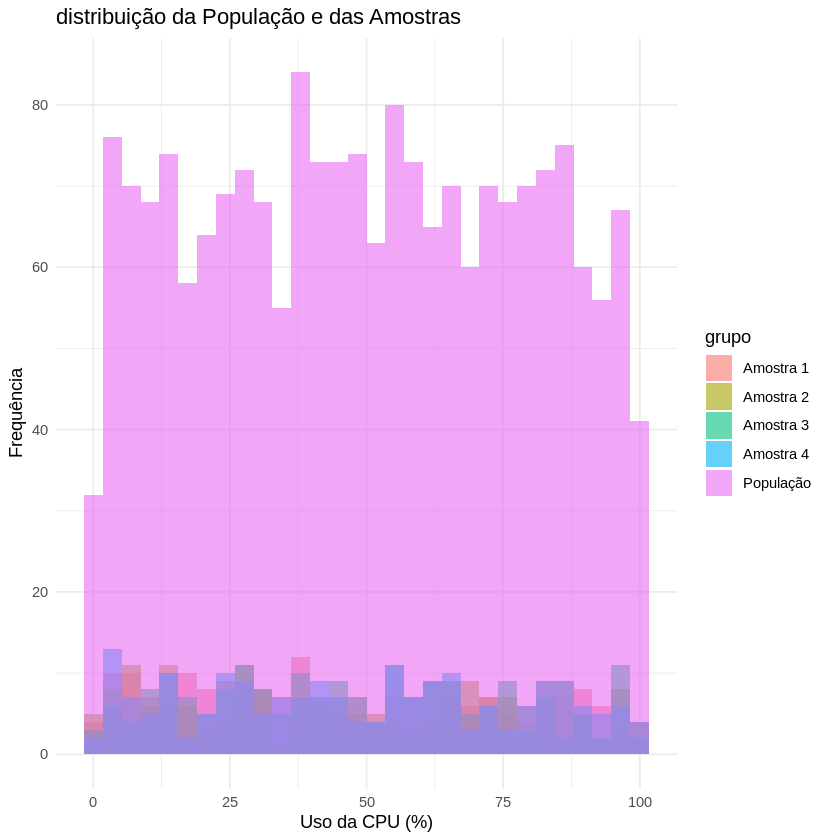

In [8]:
library(ggplot2)

dados <- data.frame(
  valor = c(populacao, amostra1, amostra2, amostra3, amostra4),
  grupo = c(rep("População", 2000),
            rep("Amostra 1", 200),
            rep("Amostra 2", 200),
            rep("Amostra 3", 200),
            rep("Amostra 4", 200))
)

ggplot(dados, aes(x = valor, fill = grupo)) +
  geom_histogram(alpha = 0.6, position = "identity", bins = 30) +
  labs(title = "distribuição da População e das Amostras",
       x = "Uso da CPU (%)", y = "Frequência") +
  theme_minimal()


# Boxplot

*Mostra a variaçã dos valores entre cada conjunto.*

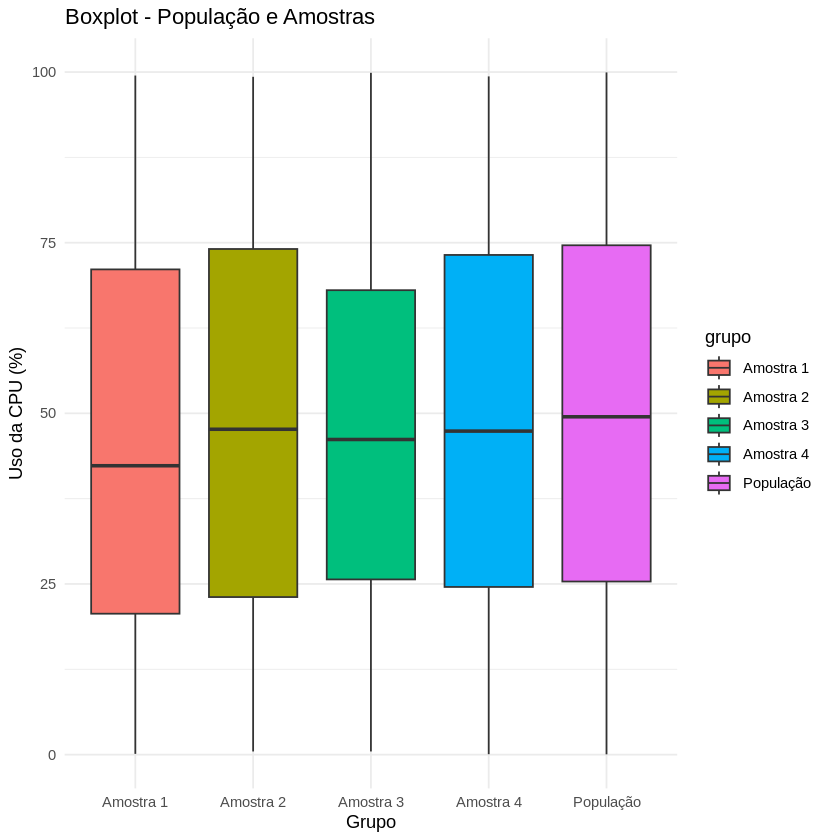

In [5]:
ggplot(dados, aes(x = grupo, y = valor, fill = grupo)) +
  geom_boxplot() +
  labs(title = "Boxplot - População e Amostras",
       x = "Grupo", y = "Uso da CPU (%)") +
  theme_minimal()


# Gráfico de médias e desvios padrão

*Mostra visualmente as médias e os desvios padrão de cada grupo, permitindo comparar o quanto eles variam.*

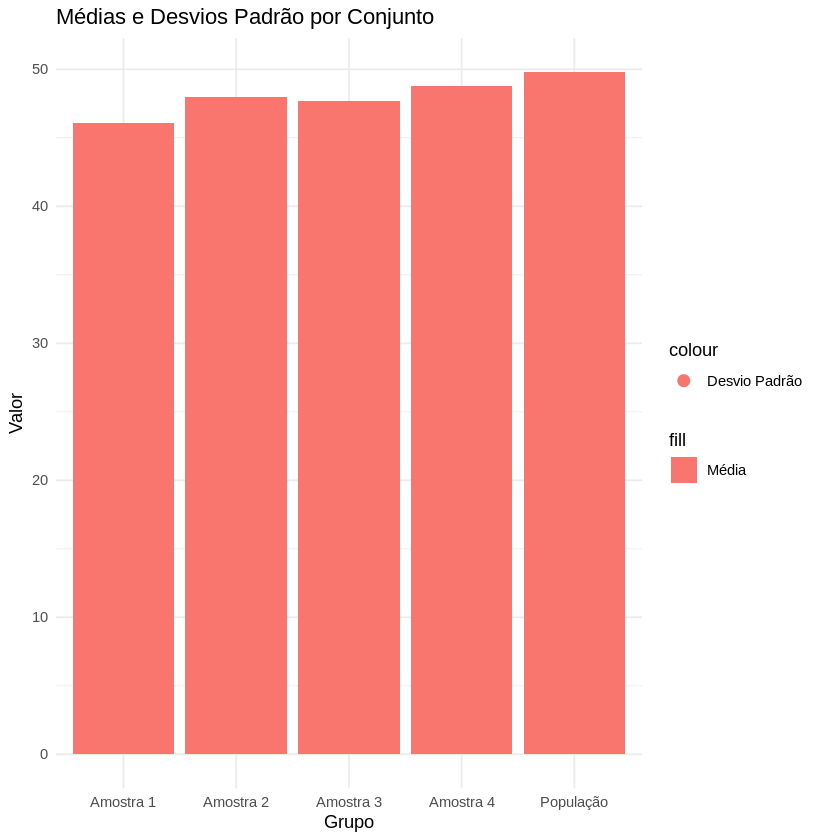

In [6]:
metricas <- data.frame(
  Conjunto = tabela$Conjunto,
  Media = as.numeric(tabela$Média),
  DesvioPadrao = as.numeric(tabela$Desvio_Funcao)
)

ggplot(metricas, aes(x = Conjunto)) +
  geom_col(aes(y = Media, fill = "Média"), position = "dodge") +
  geom_point(aes(y = DesvioPadrao, color = "Desvio Padrão"), size = 3) +
  labs(title = "Médias e Desvios Padrão por Conjunto",
       y = "Valor", x = "Grupo") +
  theme_minimal()


Os resultados mostram que os cálculos feitos na mão e os feitos pelas funções do R var e sd deram praticamente o mesmo resultado. Isso prova que as fórmulas usadas estão certas e que o R faz as contas do mesmo jeito, só que de forma automática.

Dá para observar também que as quatro amostras ficaram um pouco diferentes entre si — tanto na média quanto no desvio padrão. Isso é normal, porque cada amostra é sorteada de forma aleatória, então algumas pegam mais valores altos, outras mais baixos. Por isso, os resultados nunca vão ser idênticos.

A população, por ter 2000 valores, acaba sendo mais estável. Ela mostra melhor o comportamento geral dos dados, já que tem muito mais informações. As amostras, por terem menos dados (200), sofrem mais variação e podem mudar bastante dependendo de quais valores foram sorteados.

Quanto menor a amostra, mais fácil ela se afastar do que acontece na população. Isso é o que chamamos de erro amostral — basicamente, pequenas diferenças por conta da sorte na hora do sorteio.

Nos gráficos isso fica bem visível:

- No histograma, dá pra ver que a forma das distribuições é parecida, mas as amostras têm alguns “altos e baixos” a mais, porque têm menos dados.

- No boxplot, a dispersão das amostras é parecida com a da população, mas a mediana e o tamanho das caixas mudam um pouquinho.

- No gráfico de médias e desvios padrão, dá pra ver que os valores da população ficam bem próximos do centro, e as amostras variam um pouco pra cima ou pra baixo.

**Resumindo:**

Os cálculos deram certo, as diferenças entre as amostras são normais e o tamanho da amostra influencia bastante.
Quanto mais dados a gente tem, mais parecidos os resultados ficam com o da população — e os gráficos ajudam muito a perceber isso visualmente.